<a href="https://colab.research.google.com/github/BR-Lab/ML-algorithm/blob/main/Random_Forest_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest 실습

## 0.Introduction

<분석 모델>
*  데이터 전처리
*  Random Forest model 구축(hyperparameter 탐색)
   * k-fold cross validation 활용해 best parameter 선정
*  KNN, Decision Tree 와의 성능 비교

<분석 데이터>
*  유방암 진단결과 data

<그 외>
*  regression 모델도 구축해보기 & KNN과 Decision Tree Regression과 성능비교

## 1.import module

In [1]:
#fashion mnist 데이터 패키지
from sklearn.datasets import load_breast_cancer, load_boston

#데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#ML model 구축
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#데이터 시각화 패키지
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#예측 결과 지표 패키지
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix

#한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

#기타
from IPython.display import display, HTML
import warnings, itertools, time
warnings.filterwarnings(action = 'ignore')

## 2.데이터 불러오기 & 전처리

In [2]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
breast_cancer.data.shape

(569, 30)

In [4]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.tail()

,diagnosis
564,0
565,0
566,0
567,0
568,1


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
y['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=2021)

#Scaling
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f' Train set dimension is {X_train.shape}')
print(f' Test set dimension is {X_test.shape}')

 Train set dimension is (398, 30)
 Test set dimension is (171, 30)


## 3.model 학습하기

### 3.1 단순모델링(마음대로 하이퍼 파라미터 정의)


In [11]:
# 단순모델링(마음대로 하이퍼 파라미터 정의)
rfc = RandomForestClassifier(n_estimators=10, random_state=2021)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [12]:
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_pred = y_pred, y_true = y_train)
print("Train set에 대한 성능")
print(f'정확도: {acc:0.4f}')

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_pred = y_pred, y_true = y_test)
print("Test set에 대한 성능")
print(f'정확도: {acc:0.4f}')

Train set에 대한 성능
정확도: 1.0000
Test set에 대한 성능
정확도: 0.9591


###3.2 단일 하이퍼 파라미터에 대한 Grid Search


100%|██████████| 50/50 [01:36<00:00,  1.93s/it]
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


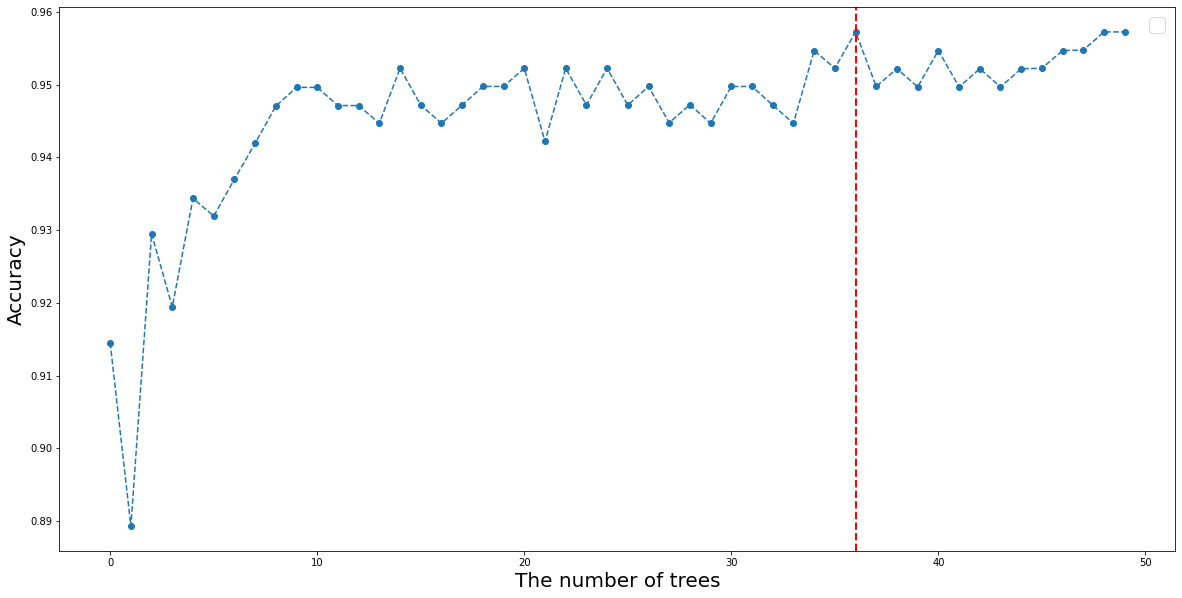

In [13]:
cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)) :
  rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=2021)
  score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
  cv_scores.append(score)

best_k = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(['Cross Validation scores'], fontsize=20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('The number of trees', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)

plt.show()

In [14]:
print(f'최적의 tree 개수: {(cv_scores.index(max(cv_scores)))+1}')
print("\n")
print("Train set 에 대한 성능 {10 fold cross validations}")
print(f'정확도: {max(cv_scores):0.4f}')

최적의 tree 개수: 37


Train set 에 대한 성능 {10 fold cross validations}
정확도: 0.9572


In [15]:
rfc = RandomForestClassifier(n_estimators=37, n_jobs=-1, random_state=2021)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_train)
acc = accuracy_score(y_pred=y_pred, y_true=y_train)
print("Train set에 대한 성능")
print(f'정확도: {acc:0.4f}')

y_pred = rfc.predict(X_test)
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print("Test set에 대한 성능")
print(f'정확도: {acc:0.4f}')

Train set에 대한 성능
정확도: 1.0000
Test set에 대한 성능
정확도: 0.9766


###3.3 전체 하이퍼 파라미터에 대한 Grid Search(파라미터 최적화)

[sklearn에서 제공하는 RnadomForest 하이퍼 파라미터 정보](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

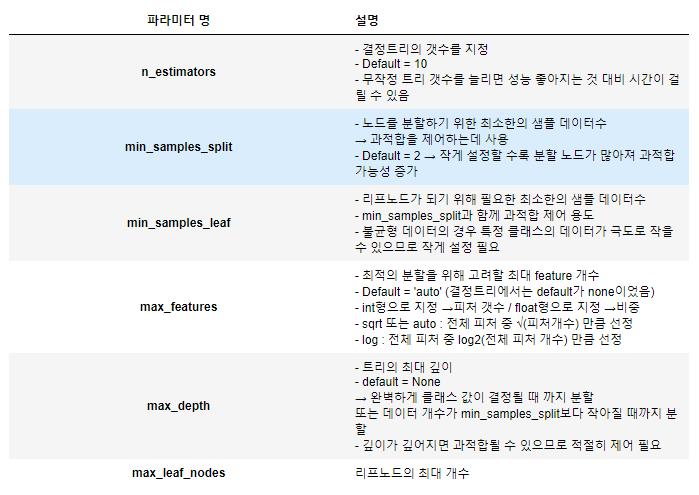

In [16]:
rfc = RandomForestClassifier(random_state=2021)

param_grid = {
              'n_estimators': [50,60,70],
              'max_depth': [10,15,20],
              'max_leaf_nodes': [50,100,200],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqr1', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1) #varbose는 시각화에 관한 progress 파라미터
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [17]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'n_estimators': 50}

In [18]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[{'params', 'mean_test_score'}])

     mean_test_score                                             params
81          0.959808  {'criterion': 'entropy', 'max_depth': 10, 'max...
111         0.959808  {'criterion': 'entropy', 'max_depth': 15, 'max...
135         0.959808  {'criterion': 'entropy', 'max_depth': 20, 'max...
138         0.959808  {'criterion': 'entropy', 'max_depth': 20, 'max...
114         0.959808  {'criterion': 'entropy', 'max_depth': 15, 'max...
..               ...                                                ...
148              NaN  {'criterion': 'entropy', 'max_depth': 20, 'max...
149              NaN  {'criterion': 'entropy', 'max_depth': 20, 'max...
150              NaN  {'criterion': 'entropy', 'max_depth': 20, 'max...
151              NaN  {'criterion': 'entropy', 'max_depth': 20, 'max...
152              NaN  {'criterion': 'entropy', 'max_depth': 20, 'max...

[162 rows x 2 columns]


In [19]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [20]:
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_pred=y_pred, y_true=y_train)
print("Train set에 대한 성능")
print(f'정확도: {acc:0.4f}')

y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print("Test set에 대한 성능")
print(f'정확도: {acc:0.4f}')

Train set에 대한 성능
정확도: 1.0000
Test set에 대한 성능
정확도: 0.9825


In [21]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred= y_pred)

print(f"정확도: {acc:0.4f}", f"민감도: {recall:0.4f}", f"정밀도: {precision:0.4f}", sep=' | ')

정확도: 0.9825 | 민감도: 0.9907 | 정밀도: 0.9815


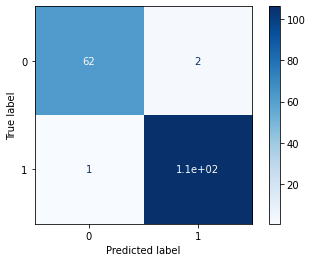

In [22]:
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

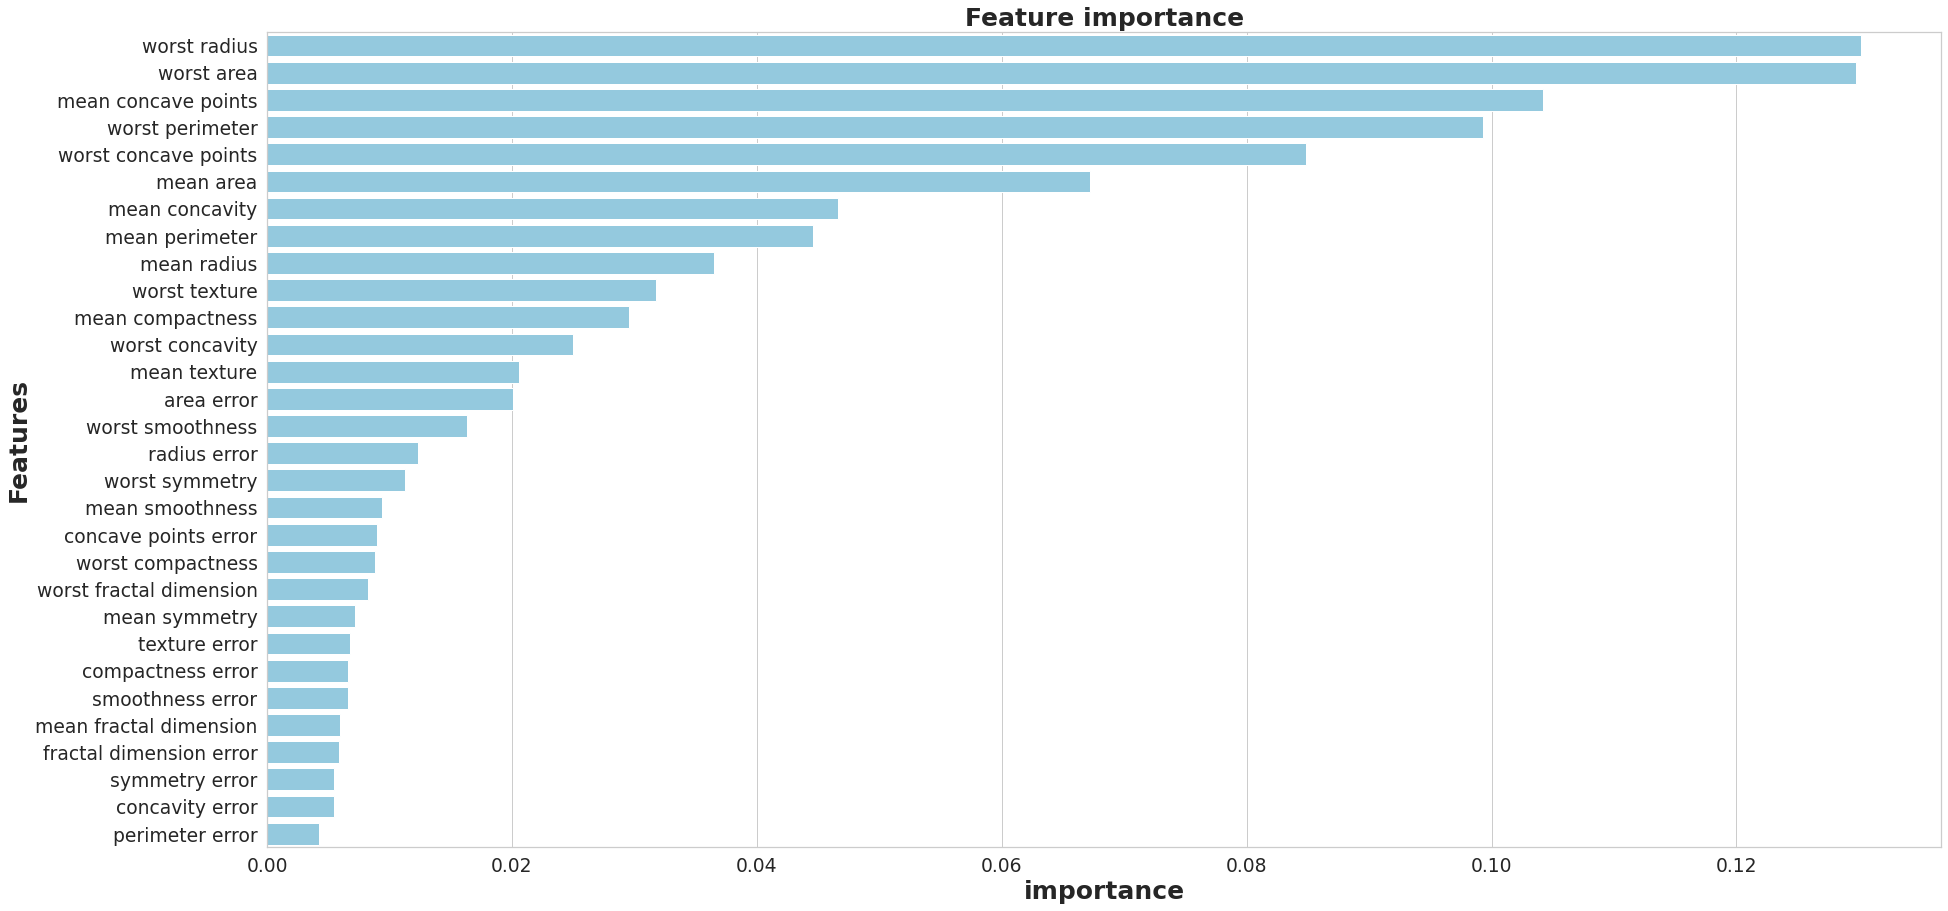

None

,Features,Gini-importance
0,worst radius,0.130206
1,worst area,0.129785
2,mean concave points,0.104198
3,worst perimeter,0.099340
4,worst concave points,0.084856
5,mean area,0.067207
6,mean concavity,0.046644
7,mean perimeter,0.044616
8,mean radius,0.036507
9,worst texture,0.031804


In [23]:
# 변수의 중요도 표시
feats = {}

for feature, importance in zip(breast_cancer.feature_names, best_rfc.feature_importances_):
  feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending = False)
importances = importances.reset_index()
importances = importances.rename(columns={'index' : 'Features'})

sns.set(font_scale = 5)
sns.set(style='whitegrid', color_codes=True, font_scale = 1.7)

fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature importance', fontsize=25, weight='bold')

display(plt.show())
display(importances)

###3.4 다른 알고리즘과 비교(KNN, Decision Tree)

In [24]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)

print("KNN")
print(f"정확도: {acc:0.4f}", f"민감도: {recall:0.4f}", f"정밀도: {precision:0.4f}", sep=' | ')

KNN
정확도: 0.9766 | 민감도: 0.9907 | 정밀도: 0.9725


In [25]:
#Decision Tree
classifier = DecisionTreeClassifier(random_state=2021)
param_grid = {
              'max_depth': [10,15,20],
              'max_leaf_nodes': [50,100,200],
              'criterion': ['gini', 'entropy'],
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1) #verbose는 시각화에 관한 progress 파라미터
CV_classifier.fit(X_train, y_train)

best_classifier = CV_classifier.best_estimator_
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)

print("Decision Tree")
print(f"정확도: {acc:0.4f}", f"민감도: {recall:0.4f}", f"정밀도: {precision:0.4f}", sep=' | ')

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Decision Tree
정확도: 0.9532 | 민감도: 0.9720 | 정밀도: 0.9541


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.3s finished


##4.Regression model 구축하기

In [26]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

rfc = RandomForestRegressor(random_state=2021)
param_grid = {
              'max_depth': [10,15,20],
              'max_leaf_nodes': [50,100,200],
              'criterion': ['mae', 'mse'],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring = 'r2') 
CV_rfc.fit(X_train, y_train)

best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

y_pred = best_rfc.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("Random Forest Regression")
print(f"R2: {r2score:0.4f}", f"MSE: {mse:0.4f}", f"MAE: {mae:0.4f}", sep=' | ')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


Random Forest Regression
R2: 0.8121 | MSE: 12.2104 | MAE: 2.2422


In [27]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=2021)
param_grid = {
              'max_depth': [10,15,20],
              'max_leaf_nodes': [50,100,200],
              'criterion': ['mae', 'mse'],
}

CV_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring = 'r2') 
CV_dtr.fit(X_train, y_train)

best_dtr = CV_dtr.best_estimator_
best_dtr.fit(X_train, y_train)

y_pred = best_dtr.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("Random Forest Regression")
print(f"R2: {r2score:0.4f}", f"MSE: {mse:0.4f}", f"MAE: {mae:0.4f}", sep=' | ')

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Random Forest Regression
R2: 0.5741 | MSE: 27.6814 | MAE: 3.1224


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.0s finished


EOD